# Activity file exploration

Let's take a look at the "Activity File" using `pandas` and its built in CSV reader.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/atusact_2019.dat")

In [2]:
df.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20190101190022,1,-1,0,-1,0,-1,-1,-1,-1,...,2,-1,04:00:00,07:00:00,1,1,1,10101,101,0
1,20190101190022,2,-1,0,-1,0,-1,-1,-1,-1,...,1,-1,07:00:00,07:30:00,1,2,1,10201,102,0
2,20190101190022,3,12,0,-1,0,-1,-1,-1,-1,...,1,-1,07:30:00,08:00:00,18,14,1,181401,1814,0
3,20190101190022,4,5,0,-1,0,-1,-1,-1,-1,...,2,-1,08:00:00,12:00:00,14,1,1,140101,1401,0
4,20190101190022,5,12,0,-1,0,-1,-1,-1,-1,...,1,-1,12:00:00,12:30:00,18,14,1,181401,1814,0


So, first things first, let's see how many unique cases there are and how many unique activity codes there are.

In [3]:
print(f"There are {len(pd.unique(df.TUCASEID))} cases and {len(pd.unique(df.TRCODE))} activity codes.")

There are 9435 cases and 386 activity codes.


Fascinating. Alright, now let's see the distribution of the diversity of activities people engage in each day.

array([[<AxesSubplot:title={'center':'TUACTIVITY_N'}>]], dtype=object)

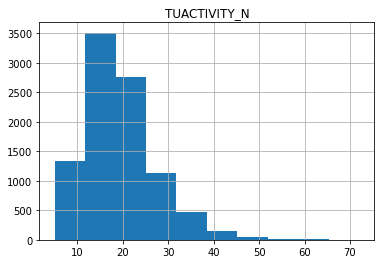

In [4]:
diversity = df.groupby("TUCASEID").agg({"TUACTIVITY_N":"count"})
diversity.hist()

In [5]:
print(f"Sanity check: The minimum number of activities one person has is {min(diversity.TUACTIVITY_N)} and the maximum is {max(diversity.TUACTIVITY_N)}")

Sanity check: The minimum number of activities one person has is 5 and the maximum is 72


Wow. That's one frenetic person with 72 unique activities...

array([[<AxesSubplot:title={'center':'TUCASEID'}>]], dtype=object)

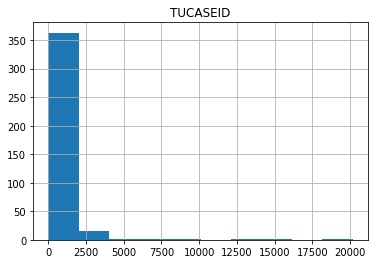

In [6]:
activities = df.groupby("TRCODE").agg({"TUCASEID": "count"})
activities.hist()

In [7]:
print(f"Sanity check: The minimum number of cases for a given activity is {min(activities.TUCASEID)} and the maximum is {max(activities.TUCASEID)}")

Sanity check: The minimum number of cases for a given activity is 1 and the maximum is 20192


I'm gonna guess the maximum is sleeping...

In [8]:
activities.sort_values(by="TUCASEID", ascending=False).iloc[0]

TUCASEID    20192
Name: 10101, dtype: int64

According to the [ATUS 2019 Activity Lexicon](https://www.bls.gov/tus/lexiconwex2019.pdf), looks like 010101 is indeed "sleeping"...

Last thing before we finish up. Can we calculate the distribution of activity durations? Let's try.

In [9]:
df.columns.values

array(['TUCASEID', 'TUACTIVITY_N', 'TEWHERE', 'TRTCCTOT_LN', 'TRTCC_LN',
       'TRTCOC_LN', 'TRTEC_LN', 'TRTHH_LN', 'TRTNOHH_LN', 'TRTOHH_LN',
       'TRTONHH_LN', 'TRTO_LN', 'TUACTDUR', 'TUACTDUR24', 'TUCC5',
       'TUCC5B', 'TUCC7', 'TUCC8', 'TUCUMDUR', 'TUCUMDUR24', 'TUDURSTOP',
       'TUEC24', 'TUSTARTTIM', 'TUSTOPTIME', 'TUTIER1CODE', 'TUTIER2CODE',
       'TUTIER3CODE', 'TRCODE', 'TRTIER2', 'TXWHERE'], dtype=object)

array([[<AxesSubplot:title={'center':'TUACTDUR'}>]], dtype=object)

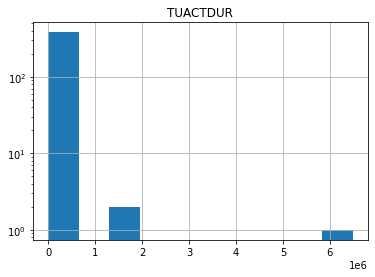

In [10]:
duration = df.groupby("TRCODE").agg({"TUACTDUR":np.sum})
duration.hist(log=True)

In [11]:
duration.sort_values(by="TUACTDUR", ascending=False).head()

,TUACTDUR
TRCODE,
10101,6484676
120303,1790340
50101,1372212
110101,608231
10201,381869


Looks like sleeping takes the crown, with "Television and movies (not religious)" and "Work, main job" as a distant second and third place. Story checks out. And with that, I'm out for the day. 